In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../assets/train.csv')
test = pd.read_csv('../assets/test.csv', index_col='Id')
weather = pd.read_csv('../assets/weather.csv')
spray = pd.read_csv('../assets/spray.csv')

## <span style='background :yellow' > Train and Test Dataset </span>

In [3]:
#Print shape of dataset
print('train:', train.shape)
print('test:', test.shape)

train: (10506, 12)
test: (116293, 10)


In [4]:
# Print columns
print(train.columns)
print(test.columns)

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')
Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy'],
      dtype='object')


##### Columns are pretty much the same for both Train and Test set. As NumMosquitos and WnvPresent are our target, it it not in the test set

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [53]:
train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [6]:
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

##### There is no null values in train dataset

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 1 to 116293
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    116293 non-null  object 
 1   Address                 116293 non-null  object 
 2   Species                 116293 non-null  object 
 3   Block                   116293 non-null  int64  
 4   Street                  116293 non-null  object 
 5   Trap                    116293 non-null  object 
 6   AddressNumberAndStreet  116293 non-null  object 
 7   Latitude                116293 non-null  float64
 8   Longitude               116293 non-null  float64
 9   AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 9.8+ MB


In [54]:
test.describe()

,Block,Latitude,Longitude,AddressAccuracy
count,116293.000000,116293.000000,116293.000000,116293.000000
mean,41.131100,41.849389,-87.693658,7.954357
std,24.864726,0.106593,0.080699,1.252733
min,10.000000,41.644612,-87.930995,3.000000
25%,18.000000,41.753411,-87.750938,8.000000
50%,39.000000,41.862292,-87.694991,8.000000
75%,61.000000,41.951866,-87.648860,9.000000
max,98.000000,42.017430,-87.531635,9.000000


In [8]:
test.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64

## <span style='background :yellow' > Weather Dataset </span>
- Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
- Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

In [9]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [11]:
weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

##### Even though data showed that there is no null value, there were missing values as it is stated as M or - Hence checking columns with object dtype that most likely are suppose to be int

In [12]:
check_col = ['Tavg', 'Depart','WetBulb','Heat','Cool',
             'Sunrise','Sunset','Depth','Water1','SnowFall',
            'PrecipTotal','StnPressure','SeaLevel','AvgSpeed']

print(weather.shape)
print('')

for col in weather[check_col]:
    station_1 = len(weather[(weather[col].str.contains('\D')) & (weather['Station']==1)])
    print(f"{col}(station 1): {str(station_1)} missing values")
    
    station_2 = len(weather[(weather[col].str.contains('\D')) & (weather['Station']==2)])
    print(f"{col}(station 2): {str(station_2)} missing values")
    print('**************')

(2944, 22)

Tavg(station 1): 0 missing values
Tavg(station 2): 11 missing values
**************
Depart(station 1): 1271 missing values
Depart(station 2): 1472 missing values
**************
WetBulb(station 1): 3 missing values
WetBulb(station 2): 1 missing values
**************
Heat(station 1): 0 missing values
Heat(station 2): 11 missing values
**************
Cool(station 1): 1096 missing values
Cool(station 2): 1021 missing values
**************
Sunrise(station 1): 0 missing values
Sunrise(station 2): 1472 missing values
**************
Sunset(station 1): 0 missing values
Sunset(station 2): 1472 missing values
**************
Depth(station 1): 0 missing values
Depth(station 2): 1472 missing values
**************
Water1(station 1): 1472 missing values
Water1(station 2): 1472 missing values
**************
SnowFall(station 1): 1472 missing values
SnowFall(station 2): 1472 missing values
**************
PrecipTotal(station 1): 1472 missing values
PrecipTotal(station 2): 1472 missing values
*

##### Most missing values appear to be from station 2

In [13]:
# Drop data from station 2? 
# imputate data from station 1 (replace to 0 or avg)

## <span style='background :yellow' > Spray Dataset </span>

In [14]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [15]:
spray.shape

(14835, 4)

In [16]:
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [ ]:
# Time is too specific and it's only available in Spray dataset 
# Consider dropping?

## <span style='background :yellow' > Duplicates for Train, Weather, Spray Dataset </span>

In [18]:
print("Original Number rows in Train Dataset: ", len(train))
print("Original Number of post in Weather Dataset: ", len(weather))
print("Original Number of post in Spray Dataset: ", len(spray))
print('')

print("Original Number Duplicates in Train Dataset: ", train.duplicated().sum())
print("Original Number Duplicates in Weather Dataset: ", weather.duplicated().sum())
print("Original Number Duplicates in Spray Dataset: ", spray.duplicated().sum())
print('')

# train.drop_duplicates(inplace = True)
# weather.drop_duplicates(inplace = True)
# spray.drop_duplicates(inplace = True)

# print("Number of rows in train w/o duplicates: ", len(train))
# print("Number of rows in Weather w/o duplicates: ", len(weather))
# print("Number of rows in spray w/o duplicates: ", len(spray))

Original Number rows in Train Dataset:  10506
Original Number of post in Weather Dataset:  2944
Original Number of post in Spray Dataset:  14835

Original Number Duplicates in Train Dataset:  813
Original Number Duplicates in Weather Dataset:  0
Original Number Duplicates in Spray Dataset:  541



##### As stated, test results are organized in such a way that when the number of mosquitos exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitos are capped at 50. Hence, will not be dropping the duplicates

## <span style='background :yellow' > EDA</span>

In [19]:
train['Species'].value_counts(normalize = True)

CULEX PIPIENS/RESTUANS    0.452313
CULEX RESTUANS            0.260803
CULEX PIPIENS             0.256901
CULEX TERRITANS           0.021131
CULEX SALINARIUS          0.008186
CULEX TARSALIS            0.000571
CULEX ERRATICUS           0.000095
Name: Species, dtype: float64

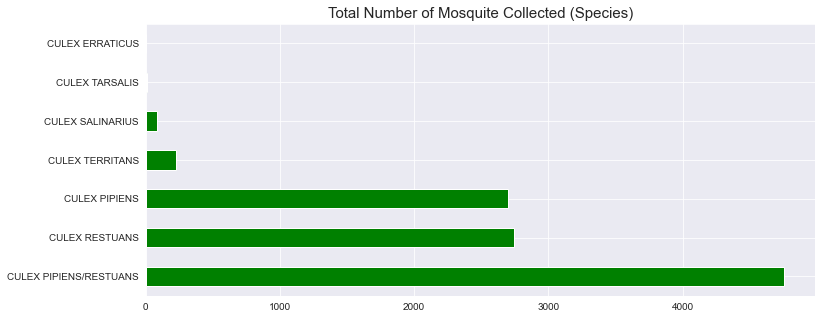

In [40]:
train['Species'].value_counts().plot(kind = 'barh', color='Green', figsize=(12,5))
plt.title('Total Number of Mosquite Collected (Species)', fontsize=15);

##### There are a total of 7 species with culiex pipiens/restuans being the most.

In [21]:
# train['Trap'].value_counts().plot(kind = 'hist')
# plt.tight_layout();

In [22]:
train.WnvPresent.value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

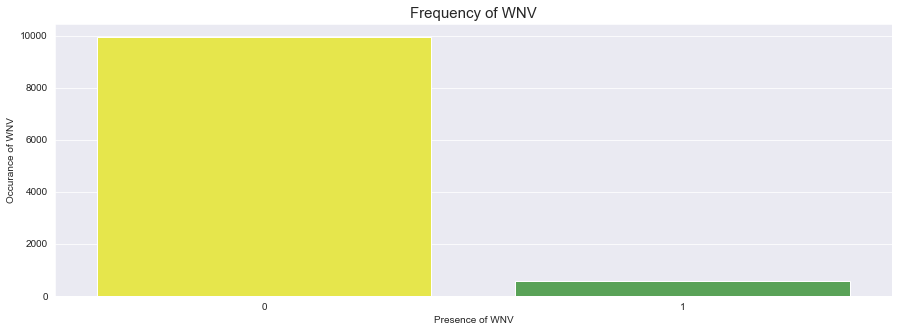

In [41]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="WnvPresent", palette='Set1_r', data=train)
plt.title('Frequency of WNV', fontsize=15)
plt.xlabel('Presence of WNV',fontsize=10)
plt.ylabel('Occurance of WNV',fontsize=10);

##### Unbalance data

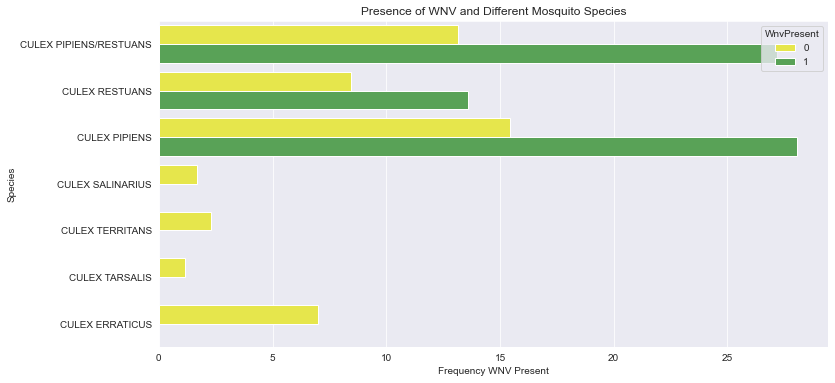

In [42]:
# Looking at the Frequency of MNV in difference mosquito species
plt.figure(figsize=(12,6))
sns.barplot(y='Species', x='NumMosquitos', hue='WnvPresent', data=train, palette='Set1_r', ci=None)
plt.title('Presence of WNV and Different Mosquito Species')
plt.xlabel('Frequency WNV Present');

In [25]:
train[train['WnvPresent'] == 1]['Species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX PIPIENS', 'CULEX RESTUANS'],
      dtype=object)

##### WNV is only present in the following 3 species of Mosquitos (In train Dataset):
- CULEX PIPIENS/RESTUANS
- CULEX PIPIENS
- CULEX RESTUANS

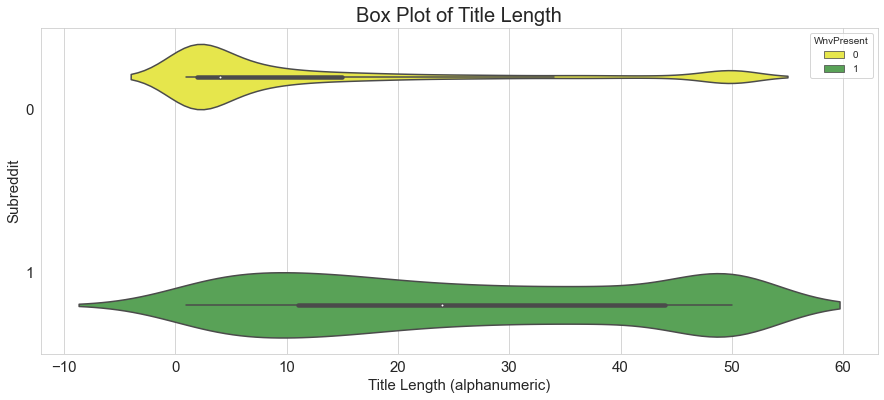

In [50]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.violinplot(y= 'WnvPresent', 
                    x='NumMosquitos',
                    data=train, 
                    orient='h', 
                    hue='WnvPresent',
                    palette='Set1_r')

ax.set_title('Box Plot of Title Length',fontsize=20)
ax.set_xlabel("NumMosquitos",fontsize=15)
ax.set_ylabel("WnvPresent",fontsize=15)
ax.tick_params(labelsize=15)

##### With WnvPresent==0, there is quite a number of outliers

## <span style='background :yellow' > Feature Engineering </span>

In [ ]:
# convert to datatime and split into year and month

def split_date (data):
    data['Date'] = pd.to_datetime(data['Date'])
    data['year'] = data.Date.dt.year
    data['month'] = data.Date.dt.month
    return

In [ ]:
split_date(train)
split_date(test)
split_date(weather)
split_date(spray)

In [ ]:
# split up species
def dummify_species (data):
    #Convert Date column to Date time object
    data['Species'] = pd.get_dummies(data, columns = ['Species'])   
    return

In [ ]:
dummify_species(train)
dummify_species(test)

## <span style='background :yellow' > Merging DataFrame </span>